1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):


In [114]:
# librerie:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as npr
from scipy.stats import norm

from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter # for major and minor ticks

* 1a. Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation

In [115]:
u = 10   # mean
sd = 3   # standard deviation

npr.seed(123) # fix seed for reproducible result
x = 10 + 3*npr.randn(1000)

* 1b. Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)

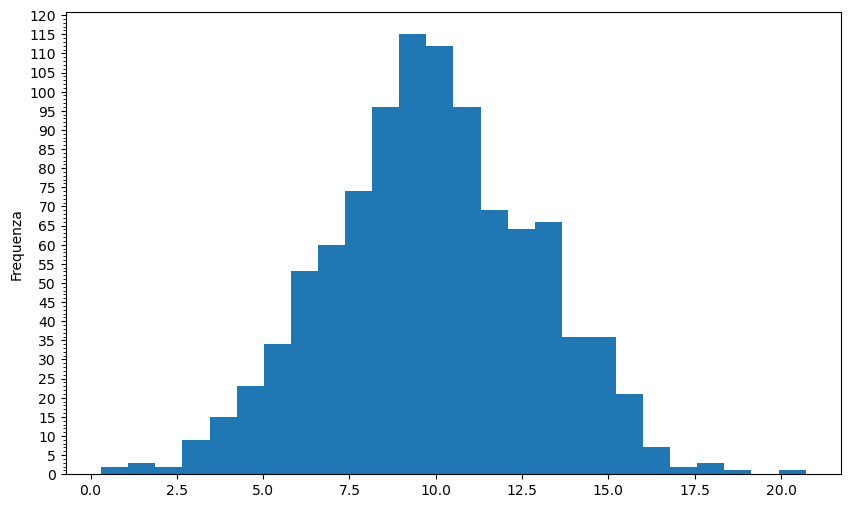

In [116]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10,6) )
ax1.hist(x, bins='auto')
ax1.set_ylabel('Frequenza')
#ax.grid()
# major ticks on yaxis:
ax1.yaxis.set_major_locator(MultipleLocator(5))
ax1.yaxis.set_minor_locator(MultipleLocator(1))

<ErrorbarContainer object of 3 artists>

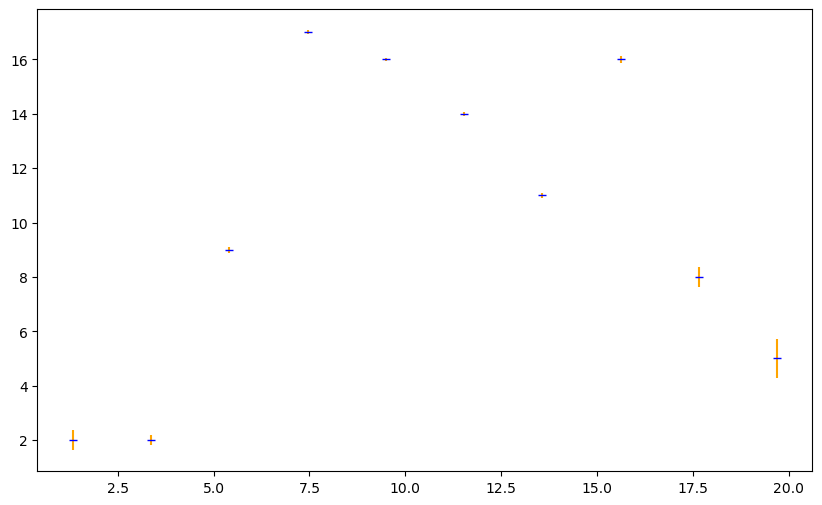

In [123]:
# hisogram as data point
freq, bin_edges = np.histogram(x)   # prendo le altezze e le coordinate x dei bin
errors = 1/np.sqrt(freq)            # errore di poisson
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Centri dei bin
fig, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(10,6) ) # oppure con 'fig.add_subplot ax2' ?
ax2.errorbar(bin_centers, counts, yerr=errors, fmt='b_', ecolor='orange',  label='Dati con errore di Poisson')

* 1c. for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.

1000
1000


ValueError: x and y must have same first dimension, but have shapes (1,) and (11,)

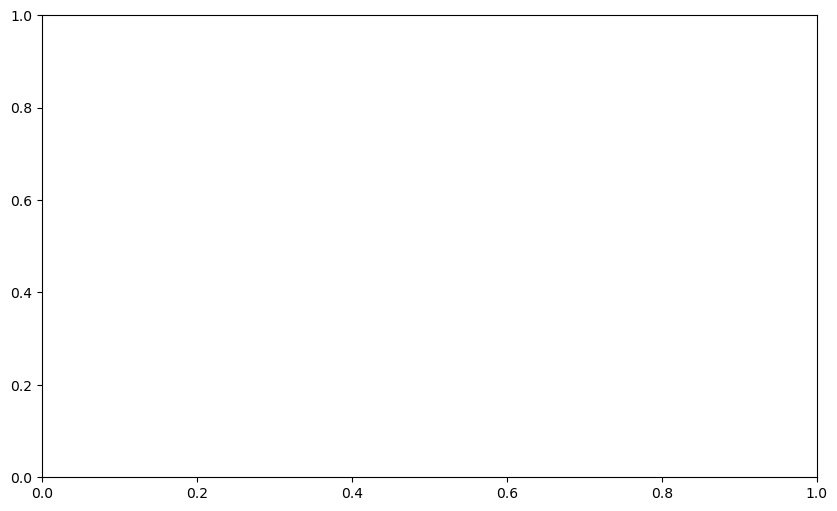

In [134]:
from scipy.stats import norm

std = 0.5  # You can adjust this value
# Generate Gaussians for each element in x using scipy.stats.norm
gaussians = [norm.pdf(bin_edges, loc=mean, scale=std) for mean in x]
print(len(gaussians))
print(len(x))
# Plot the individual Gaussians
plt.figure(figsize=(10, 6))
for mean, gaussian in zip(x, gaussians):
    plt.plot(mean, gaussian, linestyle='--', alpha=0.5)

# # Sum all Gaussians to create a density-like plot
# sum_gaussian = np.sum(gaussians, axis=0)
# # Plot the sum of all Gaussians
# plt.plot(bin_edges, sum_gaussian, color='black', linewidth=2, label='Sum of Gaussians')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Gaussian Functions for Each Element in x')
# plt.legend()
plt.grid()
plt.show()


* 1d. In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained

* 1e. Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2020-11-17 14:38:20--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.1
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 301 Moved Permanently
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2020-11-17 14:38:20--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83UcrULRU6e9PqpgyW2Ud6gq_BVV1oIDp8Jfng/file# [segue]
--2020-11-17 14:38:21--  https://ucf08e6905d1af2d3896db082fc4.dl.dropboxusercontent.com/cd/0/inline/BDXix2_dqdgaay0CqpUasoeq-d7qojUHdcsmMO4LSt4qx-6aIfFdyTse5ykuTp1AKTZzWHqB83Ucr

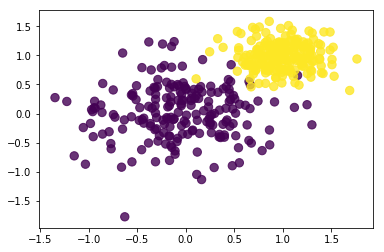

In [18]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot